<a href="https://colab.research.google.com/github/sbbwoy/ESAA/blob/main/220508_NLP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##06 토픽 모델링Topi Modeling

: 문서 집합에 숨어있는 주제를 찾아내는 것. 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출.

- LSA(Latent Semantic Analysis)
- LDA(Latent Dirichlet Allocation)

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
#모토사이클, 야구, 그리픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x', 'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

news_df = fetch_20newsgroups(subset = 'all', remove = ('headers', 'footers', 'quotes'), categories = cats, random_state=0)

# LDA는 Count 기반의 벡터화만 적용
count_vect = CountVectorizer(max_df = 0.95, max_features = 1000, min_df = 2, stop_words = 'english', ngram_range = (1, 2))

feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


7862개 문서가 1000개의 피처로 구성된 행렬 데이터 -> LDA 토픽 모델링. 토픽은 동일하게 n_components 파라미터를 이용해 토픽 개수 조정

In [ ]:
lda = LatentDirichletAllocation(n_components = 8, random_state = 0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

-> lda 객체가 components_ 속성값을 가지게 됨. components_는 개별 토픽별로 각 word가 얼마나 많이 토픽에 할당되었는지에 대한 수치, 높을수록 중심 word가 됨

In [ ]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

components_array의 0번째 row, 10번째 col에 있는 값은 Topic #0에 대해 피처 벡터화된 행렬에서 10번째 칼럼에 해당하는 피처가 Topic #0에 연관되는 수치 값을 가짐

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        #components_ array에서 내림차순 정렬 후 인덱스 반환
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]

        #top_indexes대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

In [ ]:
#CountVectorizer 객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names()

#토픽별 가장 연관도가 높은 word를 15개 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


- Topic 0: medical
- Topic 1: ??
- Topic 2: ??
- Topic 3: ??
- Topic 4: israel
- Topic 5: computer graphics
- Topic 6: church
- Topic 7: window

##07 문서 군집화Document Clustering

: 비슷한 텍스트 구성의 문서를 군집화하는 것

- 텍스트 분류 기반 문서 분류: 사전에 결정 카테고리 값을 가진 학습 데이터 세트 요구
- 문서 군집화: 학습 데이터 세트가 필요 없는 비지도학습 기반

##08 문서 유사도 측정 - 코사인 유사도

: 두 벡터 사이의 사잇각을 구해 얼마나 유사한지 수치화

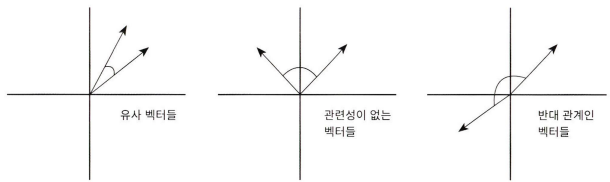

두 벡터의 내적 계산

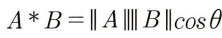

유사도 cosθ = 두 벡터의 내적 / 총 벡터 크기의 합

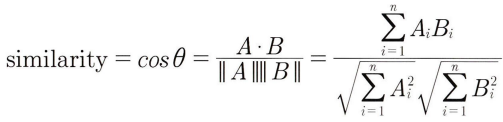

코사인 유사도가 문서 유사도 비교에 자주 사용되는 이유

- 문서를 피처 벡터화 시 고차원 희소 행렬이 되기 쉬움. 이는 문서와 문서 벡터 간 크기에 기반한 유사도 지표(e.g. 유클리드 거리 기반 지표)는 정확도가 떨어지기 쉬움
- 문서가 매우 긴 경우, 빈도수에만 기반해서는 공정한 비교 불가능 

In [ ]:
import numpy as np

In [29]:
def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm

    return similarity

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [30]:
#TfidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

#첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

#첫 번째 문장과 두 번째 문장의 피처 벡터로 두 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [31]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_sample = cos_similarity(vect1, vect3)
print('문장1, 문장 3 Cosine 유사도: {}'.format(similarity_sample))

문장1, 문장 3 Cosine 유사도: 0.4042504477594862


In [32]:
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_sample = cos_similarity(vect2, vect3)
print('문장2, 문장 3 Cosine 유사도: {}'.format(similarity_sample))

문장2, 문장 3 Cosine 유사도: 0.45647296026166395


사이킷런의 코사인 유사도 측정 cosine_similarity(param1, param2)

* param1: 비교 기준이 되는 문서의 피처 행렬
* param2: 비교되는 문서의 피처 행렬

희소 행렬, 밀집 행렬, 배열 모두 가능

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [35]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


###**Opinion Review 데이터 세트를 이용한 문서 유사도 측정**

In [36]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
path = '/content/drive/MyDrive/ESAA/OpinosisDataset1.0/OpinosisDataset1.0/topics'
#path 디렉터리 밑에 있는 모든 .data 파일의 파일명을 리스트화
all_files = glob.glob(os.path.join(path, '*.data'))
filename_list = []
opinion_text = []

#개별 파일의 파일명은 filenames_list로 취합
#개별 파일의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환해 opinion_text list로 취합
for file_ in all_files:
    #개별 파일을 읽어 df로 생성
    df = pd.read_table(file_, index_col = None, header = 0, encoding = 'latin1')

    #절대 경로로 주어진 파일명을 가공, 확장자 제거
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]

    #파일명 list와 파일 내용 list에 파일명과 파일 내용 추가
    filename_list.append(filename)
    opinion_text.append(df.to_string())

#파일명 list와 파일 내용 list 객체를 df로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,battery-life_amazon_kindle,...
1,bathroom_bestwestern_hotel_sfo,...
2,battery-life_ipod_nano_8gb,...
3,battery-life_netbook_1005ha,...
4,comfort_honda_accord_2008,...


In [38]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

def LemTokens(tokens):
    lemmer = nltk.stem.WordNetLemmatizer()
    return [lemmer.lemmatize(token) for token in tokens]

def LemNormalize(text):
    remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [43]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [45]:
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words = 'english',
                             ngram_range=(1, 2), min_df = 0.05, max_df = 0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])
km_cluster = KMeans(n_clusters = 3, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


In [46]:
from sklearn.metrics.pairwise import cosine_similarity

#cluster_label=1인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 군집화 된 문서들의 DataFrame Index:',hotel_indexes)

#호텔로 군집화된 데이터 중 첫번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('####비교 기준 문서명', comparison_docname,' 와 타 문서 유사도 ####')

'''document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화 된 문서들의 DataFrame Index: Int64Index([1, 12, 13, 14, 16, 18, 24, 27, 29, 30, 31, 35, 36, 38, 39, 41], dtype='int64')
####비교 기준 문서명 bathroom_bestwestern_hotel_sfo  와 타 문서 유사도 ####
[[1.         0.1386783  0.13989623 0.11282857 0.07049362 0.09518068
  0.11742762 0.03638665 0.38038865 0.51442299 0.32619948 0.06193118
  0.05846178 0.06189595 0.05221059 0.0430688 ]]


Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

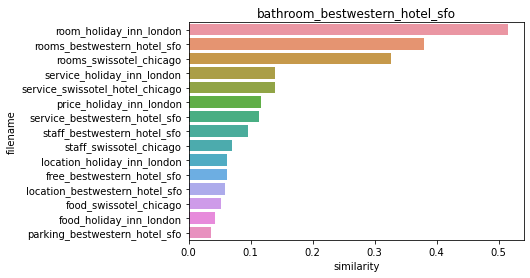

In [47]:
#visualization
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#첫번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:,1:]

#유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

#유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

#유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

##09 한글 텍스트 처리 - 네이버 영화 평점 감성 분석

**한글 NLP 처리의 어려움** 1. 띄어쓰기 2. 다양한 조사

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

In [53]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

In [55]:
import pandas as pd
train_df = pd.read_csv('/content/ratings_train.txt',sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [56]:
train_df['label'].value_counts() #1이 긍정, 0이 부정

0    75173
1    74827
Name: label, dtype: int64

In [57]:
import re

train_df = train_df.fillna(' ')
#정규 표현식을 이용해 숫자를 공백으로 변경
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r'\d+',' ',x))

#테스트 데이터 세트를 로딩하고 동일하게 Null 및 숙자를 공백으로 변환
test_df = pd.read_csv('/content/ratings_test.txt',sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r'\d+',' ',x))

#id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [ ]:
from konlpy.tag import Okt
okt = Okt()
def tw_tokenizer(text):
  #입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko = okt.morphs(text)
  return tokens_ko

In [60]:
#TF-IDF 피처 모델 생성
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [61]:
#로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state=0)

#파라미터 C 최적화를 위해 GridSearchCV를 이용
params = {'C':[1, 3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy',verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 3.5} 0.8593


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [62]:
from sklearn.metrics import accuracy_score

#학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

#classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 사용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ', accuracy_score(test_df['label'], preds) )

Logistic Regression 정확도:  0.86186
